**Contexte**

Les compagnies d'assurance qui vendent des assurances vie, santé, et dommages aux biens utilisent l'apprentissage automatique (ML) pour améliorer le service client, détecter les fraudes, et optimiser leur efficacité opérationnelle. L'une de ces compagnies, qui propose des assurances santé à ses clients, utilise également le ML pour mieux comprendre leur comportement. Nous pouvons ainsi construire un modèle pour prédire si les titulaires de polices d'assurance de l'année précédente seraient également intéressés par l'assurance automobile proposée par l'entreprise.

Une police d'assurance est un contrat par lequel une entreprise s'engage à garantir une compensation en cas de perte, dommage, maladie ou décès, en échange du paiement d'une prime spécifique. Une prime est une somme d'argent que le client doit payer régulièrement à une compagnie d'assurance en échange de cette garantie.

Par exemple, vous pouvez payer une prime de 5000 Rs chaque année pour une couverture d'assurance santé de 200 000 Rs. Si, par malheur, vous tombez malade et devez être hospitalisé cette année-là, la compagnie d'assurance couvrira les frais d'hospitalisation jusqu'à 200 000 Rs. Maintenant, si vous vous demandez comment l'entreprise peut couvrir des frais d'hospitalisation aussi élevés alors qu'elle ne perçoit qu'une prime de 5000 Rs, c'est là que le concept de probabilité entre en jeu. Par exemple, comme vous, il peut y avoir 100 clients qui paient une prime de 5000 Rs chaque année, mais seuls quelques-uns (disons 2 ou 3) seront hospitalisés cette année, et non la totalité des clients. De cette manière, tout le monde partage les risques des autres.

Tout comme l'assurance santé, il existe une assurance véhicule où chaque année, le client doit payer une prime d'un certain montant à l'assureur afin que, en cas d'accident malheureux avec le véhicule, la compagnie d'assurance verse une compensation (appelée « somme assurée ») au client.

**Contenu**

Construire un modèle pour prédire si un client serait intéressé par l'assurance automobile est extrêmement utile pour l'entreprise, car cela lui permettrait d'adapter sa stratégie de communication pour cibler ces clients de manière plus efficace et d'optimiser son modèle économique ainsi que ses revenus.

Les informations disponibles incluent :
- Démographie (sexe, âge, type de code régional),
- Véhicules (âge du véhicule, dommages),
- Police d’assurance (prime, canal d'acquisition), etc.

Table of Contents
1. What is Class Imbalance

2. How Imbalanced is the data?

3. Impact of Class Imbalance Data

4. How to Handle Imbalanced Classes?

5. Importing Libraries and Files

6. EDA

7. Encoding Categorical Features

8. Splitting data set to training and Test set

9. Feature Scaling

10. Random Sampling

10.1 Oversample minority class

10.2 Undersample majority class

10.3. SMOTE

11. Reference

1. **Qu'est-ce que le déséquilibre de classes**  
Le déséquilibre de classes survient lorsque la majorité des données appartient à une seule classe ou lorsque la distribution des échantillons entre les différentes classes connues est biaisée ou déséquilibrée. Pour en savoir plus sur l'asymétrie et la distribution normale, vous pouvez consulter mon carnet.  

Si un ensemble de données comporte une cible positive et une cible négative, en cas de déséquilibre de classes, le nombre total de données de la classe positive est bien inférieur à celui de la classe négative.  

Par exemple, lorsque la cible appartient à deux classes "Oui" et "Non" et que 90 % des données appartiennent à la classe "Oui".  

Le déséquilibre de classes se produit aussi bien dans les problèmes de classification à deux classes que dans les problèmes de classification à plusieurs classes.  

2. **À quel point les données sont-elles déséquilibrées ?**  
**balanced_accuracy_score** : Le score de précision équilibrée dans les problèmes de classification binaire et multiclasses permet de traiter les ensembles de données déséquilibrés. Il est défini comme la moyenne du rappel obtenu pour chaque classe. La meilleure valeur est 1 et la pire est 0.  

**accuracy_score** : Connu sous le nom de score de classification de précision. Dans la classification multilabel, cette fonction calcule la précision des sous-ensembles : l'ensemble des étiquettes prédites pour un échantillon doit correspondre exactement à l'ensemble d'étiquettes dans *y_true*.  

Pour un ensemble de données équilibré, le **balanced_accuracy_score** devient équivalent au **accuracy_score**.  


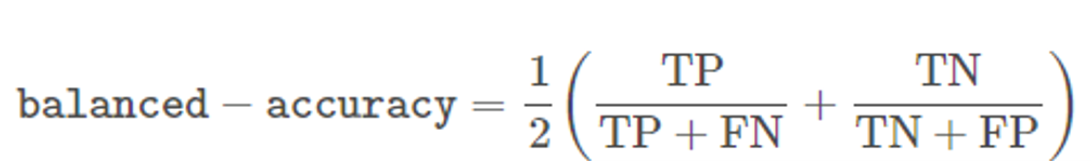



## 3. **Impact des données déséquilibrées**  
La plupart des algorithmes d'apprentissage automatique supposent que les données sont réparties de manière égale. Ainsi, lorsqu'il y a un déséquilibre de classes, le classificateur d'apprentissage automatique a tendance à être plus biaisé en faveur de la classe majoritaire, ce qui entraîne une mauvaise classification de la classe minoritaire. Un des principaux problèmes liés à la classification des ensembles de données déséquilibrés est la détermination des métriques de performance les plus appropriées à utiliser.  

Les algorithmes classiques sont souvent biaisés vers la classe majoritaire car leurs fonctions de perte tentent d'optimiser des quantités telles que le taux d'erreur, sans tenir compte de la distribution des données. Dans le pire des cas, les classes minoritaires sont traitées comme des valeurs aberrantes de la classe majoritaire et sont ignorées. L'algorithme d'apprentissage génère simplement un classificateur trivial qui classe chaque exemple dans la classe majoritaire.  

4. **Comment gérer les classes déséquilibrées ?**  

1. **Changer la métrique de performance** :  

Dans un problème de classification, la performance est principalement mesurée par la précision de la classification. Pour des classes hautement déséquilibrées, le modèle prédira la valeur de la classe majoritaire pour toutes les prédictions et atteindra une précision de classification élevée. Cependant, ce modèle n'est pas utile dans le domaine du problème. C'est ce qu'on appelle le paradoxe de la précision. Pour y remédier, d'autres métriques de performance doivent être envisagées pour l'évaluation, telles que la matrice de confusion, la précision, le rappel et le score F1.  

- **Matrice de confusion** : un tableau montrant les prédictions correctes et les types de prédictions incorrectes.  
- **Précision** : le nombre de vrais positifs divisé par toutes les prédictions positives. La précision est également appelée valeur prédictive positive. C'est une mesure de l'exactitude d'un classificateur. Une faible précision indique un nombre élevé de faux positifs.  
- **Rappel** : le nombre de vrais positifs divisé par le nombre de valeurs positives dans les données de test. Le rappel est également appelé sensibilité ou taux de vrais positifs. C'est une mesure de la complétude d'un classificateur. Un faible rappel indique un nombre élevé de faux négatifs.  
- **Score F1** : la moyenne pondérée de la précision et du rappel.  

2. **Reéchantillonnage**  


Le rééchantillonnage consiste à :  
- Sous-échantillonner la classe majoritaire : Cette technique consiste à supprimer des enregistrements aléatoires de la classe majoritaire, ce qui peut entraîner une perte d'information. Cela pourrait conduire à un sur-apprentissage et une mauvaise généralisation au jeu de test.  
- Suréchantillonner la classe minoritaire : Ajouter plus d'exemples de la classe minoritaire. La mise en œuvre la plus simple du sur-échantillonnage consiste à dupliquer des enregistrements aléatoires de la classe minoritaire, ce qui peut entraîner un surapprentissage.  

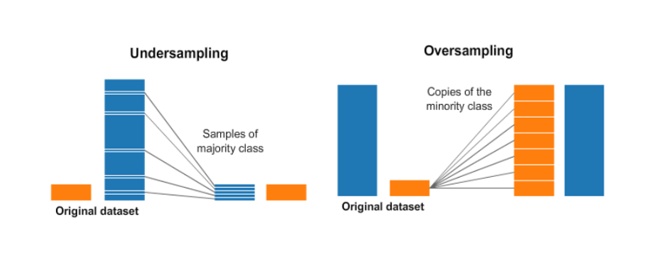



1. **SMOTE (Synthetic Minority Over-sampling Technique)** :  

Une technique de sur-échantillonnage qui génère des échantillons synthétiques à partir de la classe minoritaire. SMOTE fonctionne en utilisant un algorithme de k plus proches voisins pour créer des données synthétiques. SMOTE commence par choisir des données aléatoires de la classe minoritaire, puis les k plus proches voisins de ces données sont définis. Selon la quantité de sur-échantillonnage requise, des voisins des k plus proches voisins sont choisis aléatoirement. Les points synthétiques sont ajoutés entre le point choisi et ses voisins. Cette technique peut être utilisée lorsque les deux classes peuvent être facilement séparées.


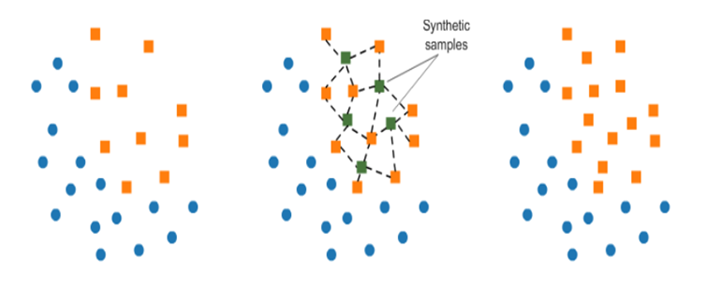



## 4. **XGBoost (Extreme Gradient Boosting)**

C'est une implémentation avancée et plus efficace des arbres de décision boostés par gradient, conçue pour la rapidité et la performance. XGBoost est 10 fois plus rapide que le Gradient Boosting classique car il implémente un traitement parallèle. Il est extrêmement flexible, car les utilisateurs peuvent définir des objectifs d'optimisation et des critères d'évaluation personnalisés, et il dispose d'un mécanisme intégré pour gérer les valeurs manquantes. Contrairement au Gradient Boosting, qui arrête de diviser un nœud dès qu'il rencontre une perte négative, XGBoost divise jusqu'à la profondeur maximale spécifiée, puis élague l'arbre à l'envers en supprimant les divisions au-delà desquelles il n'y a qu'une perte négative. Le boosting par gradient extrême peut être réalisé à l'aide du package XGBoost dans R et Python.


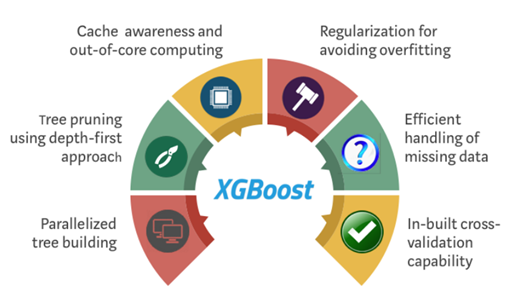

## 5. **Algorithmes Basés sur les Arbres**

Les arbres de décision fonctionnent souvent bien sur des ensembles de données déséquilibrés car leur structure hiérarchique leur permet d'apprendre des signaux provenant des deux classes. Dans l'apprentissage automatique appliqué moderne, les ensembles d'arbres comme les Forêts Aléatoires (Random Forests), les Arbres Boostés par Gradient, etc. surpassent presque toujours les arbres de décision individuels.

Ici, le rééchantillonnage et SMOTE sont abordés.

In [65]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#For Sampling
from sklearn.utils import resample


from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb 
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter
#Evaluation
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('aug_train.csv')
df_test = pd.read_csv('aug_test.csv')

#  6. EDA¶

In [3]:
df.head().style.background_gradient(cmap='Dark2_r')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.000000,1,< 1 Year,No,2630.000000,152.000000,16,0
1,17163,Male,42,1,28.000000,0,1-2 Year,Yes,43327.000000,26.000000,135,0
2,32023,Female,66,1,33.000000,0,1-2 Year,Yes,35841.000000,124.000000,253,0
3,87447,Female,22,1,33.000000,0,< 1 Year,No,27645.000000,152.000000,69,0
4,501933,Male,28,1,46.000000,1,< 1 Year,No,29023.000000,152.000000,211,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [5]:
print("Number of rows in Training set is = ", df.shape[0], " \nNumber of columns in Training set is = " , df.shape[1]) 

Number of rows in Training set is =  382154  
Number of columns in Training set is =  12


# Missing values analysis

In [6]:
df.isnull().sum().sum()

0

In [7]:
df_test.isnull().sum().sum()

0

# Statistical Analysis of Numerical Columns

In [8]:
df_num_col = df.select_dtypes(exclude=['object']).columns
df_num = df[df_num_col]
df_num.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,22,1,7.0,1,2630.0,152.0,16,0
1,17163,42,1,28.0,0,43327.0,26.0,135,0
2,32023,66,1,33.0,0,35841.0,124.0,253,0
3,87447,22,1,33.0,0,27645.0,152.0,69,0
4,501933,28,1,46.0,1,29023.0,152.0,211,0


In [9]:
df_num.describe().T.style.background_gradient(cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
id,382154.000000,234392.953477,139527.487326,1.000000,115006.250000,230461.500000,345434.750000,508145.000000
Age,382154.000000,38.545691,15.226897,20.000000,25.000000,36.000000,49.000000,85.000000
Driving_License,382154.000000,0.998108,0.043455,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,382154.000000,26.406867,13.181241,0.000000,15.000000,28.000000,35.000000,52.000000
Previously_Insured,382154.000000,0.489182,0.499884,0.000000,0.000000,0.000000,1.000000,1.000000
Annual_Premium,382154.000000,30711.271362,17061.595532,2630.000000,24546.000000,31692.000000,39447.750000,540165.000000
Policy_Sales_Channel,382154.000000,111.939812,54.286511,1.000000,26.000000,145.000000,152.000000,163.000000
Vintage,382154.000000,154.189429,83.735107,10.000000,81.000000,154.000000,227.000000,299.000000
Response,382154.000000,0.163811,0.370104,0.000000,0.000000,0.000000,0.000000,1.000000


# Heat Map for correlation of numerical features

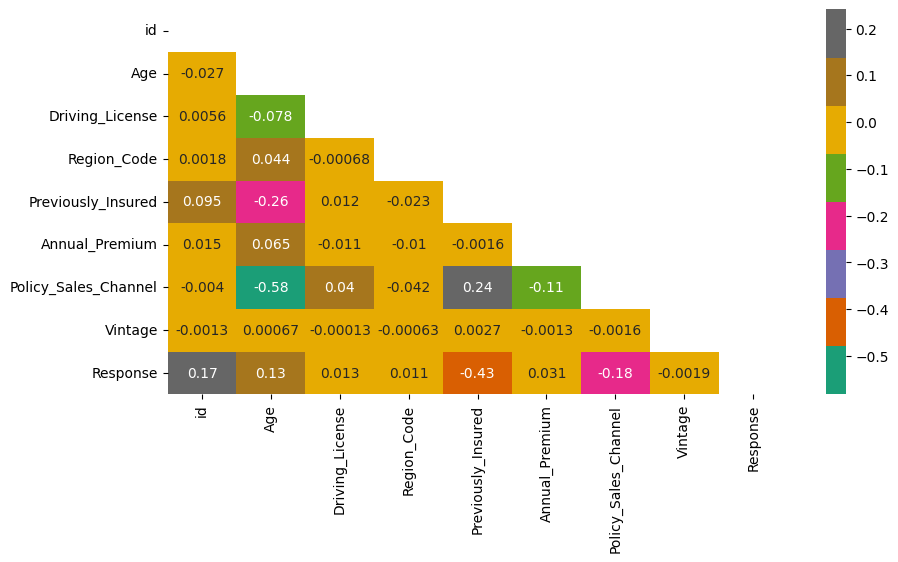

In [10]:
plt.figure(figsize=(10,5))
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot=True, cmap='Dark2');

In [11]:
correlation = (pd.DataFrame(df_num.corr().Response))
correlation.sort_values(by='Response', ascending=False).style.background_gradient(cmap='coolwarm_r')

,Response
Response,1.000000
id,0.166621
Age,0.133149
Annual_Premium,0.030777
Driving_License,0.013250
Region_Code,0.011289
Vintage,-0.001884
Policy_Sales_Channel,-0.184514
Previously_Insured,-0.431224


# Target Analysis & Visualization

In [12]:
df['Response'].value_counts() 

Response
0    319553
1     62601
Name: count, dtype: int64

In [17]:
#Count of Class zero
Response_0 =len(df[df["Response"]==0])
Response_0

319553

In [13]:
#Count of Class One
Response_1 =len(df[df["Response"]==1])
Response_1

62601

In [14]:
Total = len(df['Response'])

In [18]:
Percentage_Response_Zero = Response_0/Total
print("Percentage of Response_Zero is    : ",Percentage_Response_Zero*100)
Percentage_Response_One = Response_1/Total
print("Percentage of Response_One is    : ",Percentage_Response_One*100)


Percentage of Response_Zero is    :  83.61890756082626
Percentage of Response_One is    :  16.381092439173734


Text(0.5, 1.0, 'Class Distributions \n (0  || 1)')

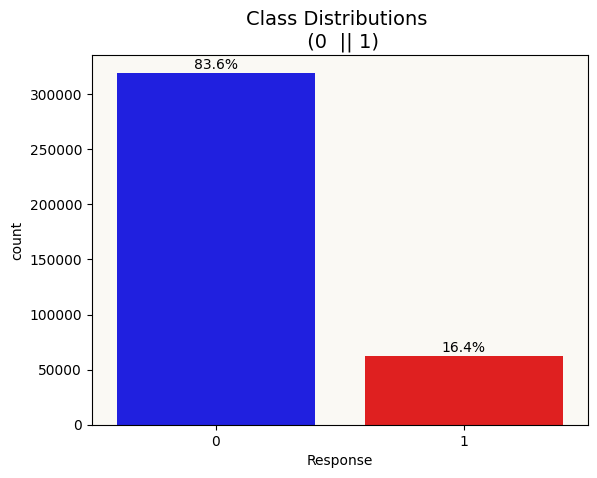

In [19]:
colors = ["blue", "red"]


ax = sns.countplot(x ='Response', data=df, palette=colors)
ax.set_facecolor('#faf9f4')
for p in ax.patches:
    percentage = f'{100 * p.get_height() / Total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    
    ax.annotate(percentage, (x, y), ha='center', va='center')
    
plt.title('Class Distributions \n (0  || 1)', fontsize=14)

# Feature Visualization

In [20]:
def feature_plot(feature):
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x =feature,data=df, palette="cool_r")
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

In [23]:
def feature_plot_with_target(feature):
    plt.figure(figsize=(10, 3))
    ax = sns.catplot(x='Response', col=feature, kind='count', data=df, palette="cool_r");
    for ax in ax.axes.ravel():
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

# Gender

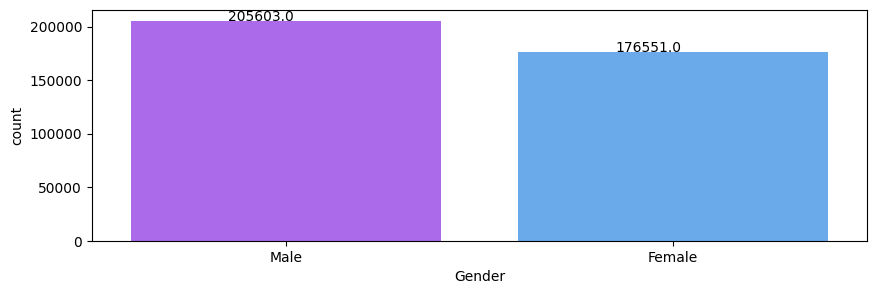

In [24]:
feature_plot('Gender')

# Gender wrt Response¶

<Figure size 1000x300 with 0 Axes>

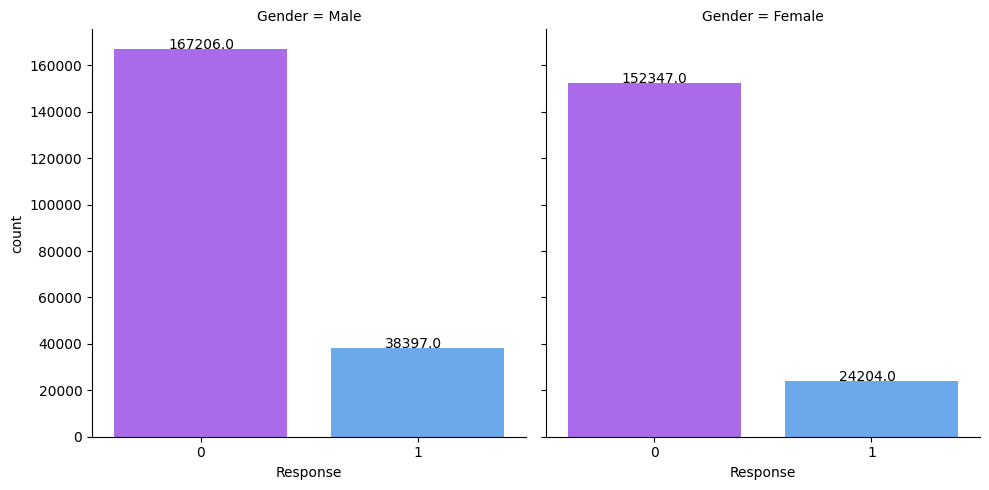

In [25]:
feature_plot_with_target('Gender')

# Driving_License¶

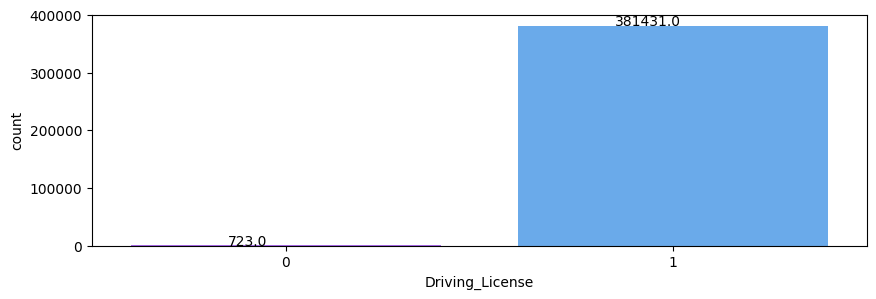

In [26]:
feature_plot('Driving_License')

# Previously_Insured

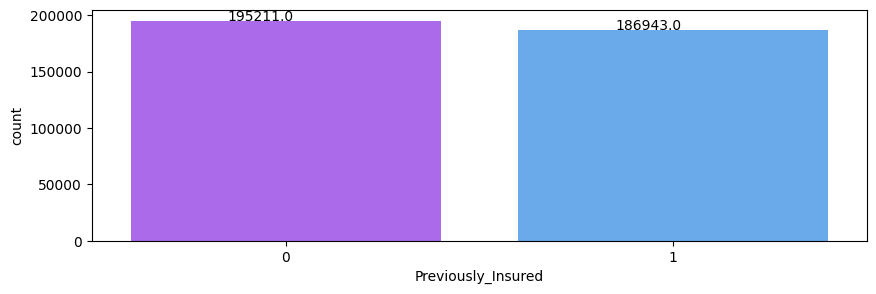

In [27]:
feature_plot('Previously_Insured')

# Previously_Insured wrt Response¶

<Figure size 1000x300 with 0 Axes>

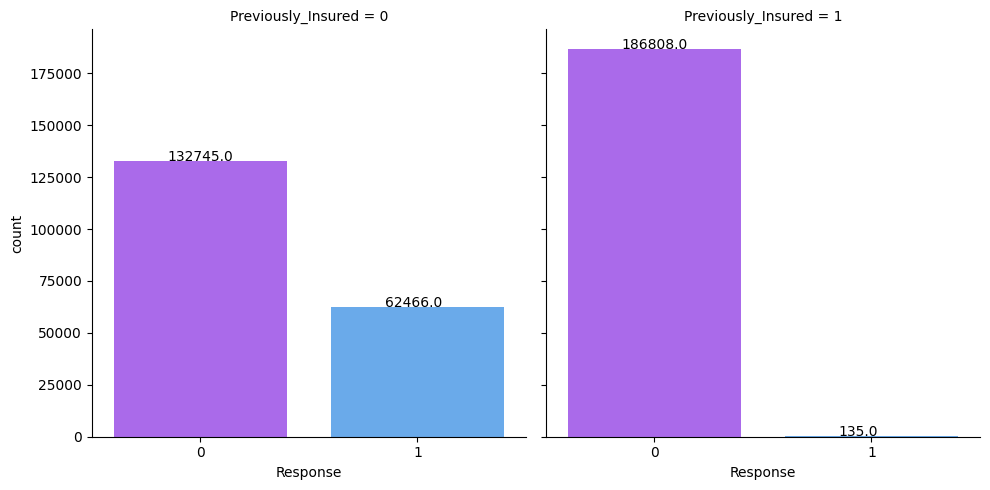

In [29]:
feature_plot_with_target('Previously_Insured')

# Vehicle_Age

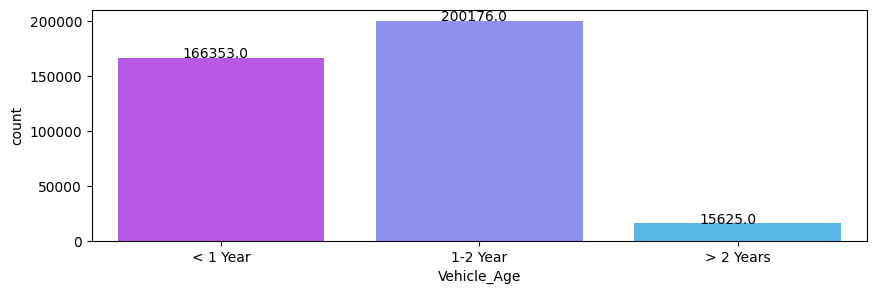

In [30]:
feature_plot('Vehicle_Age')

# Vehicle_Age wrt Response¶


<Figure size 1000x300 with 0 Axes>

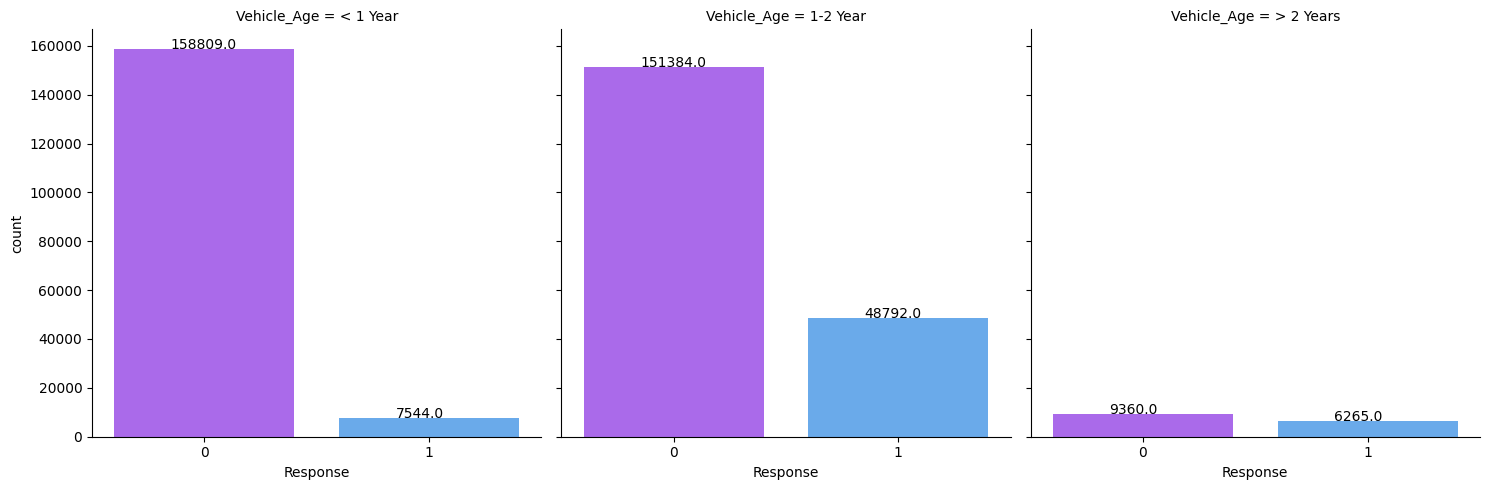

In [31]:
feature_plot_with_target('Vehicle_Age')

# Vehicle_Damage

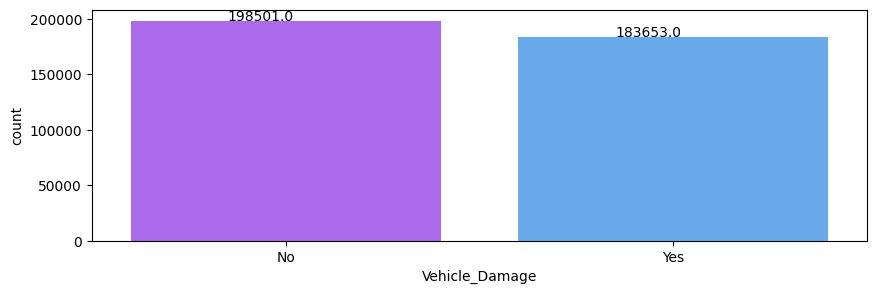

In [32]:
feature_plot('Vehicle_Damage')

# Vehicle_Damage wrt Response

<Figure size 1000x300 with 0 Axes>

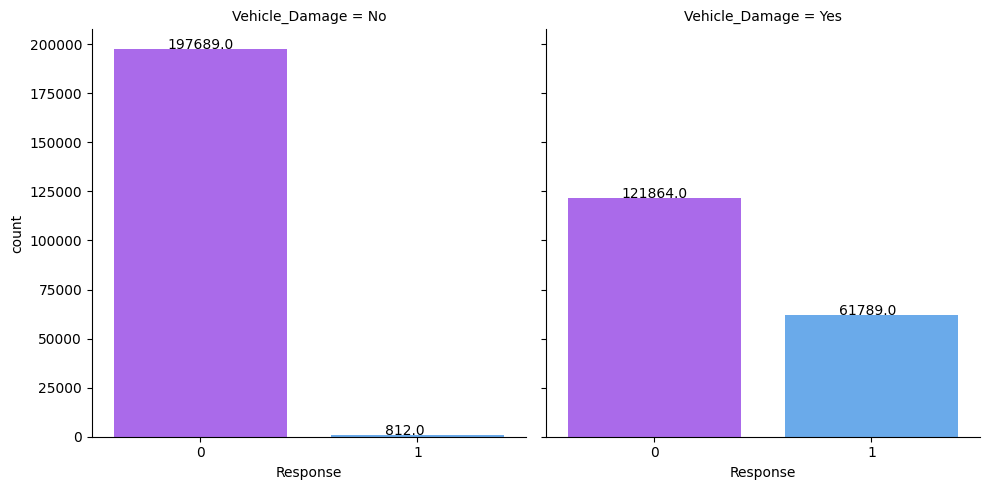

In [33]:
feature_plot_with_target('Vehicle_Damage')

# Age

In [34]:
def hist_feat(feature):
    plt.figure(figsize=(10, 3))
    sns.histplot(df[feature].dropna(),kde=True,color='purple',bins=30)

In [35]:
def dist_feat_w_target(feature):
    sns.displot(data=df, x=feature,hue='Response',kind ='kde')

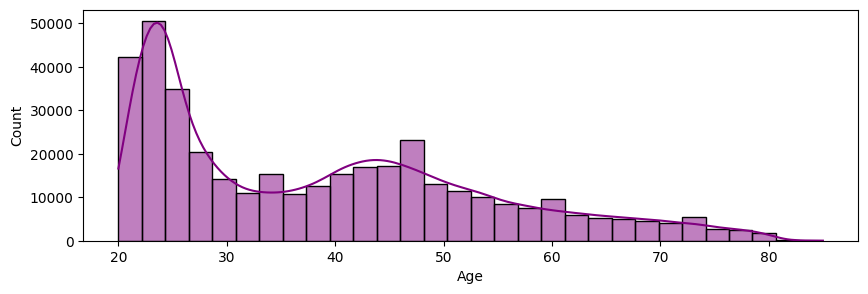

In [36]:
hist_feat('Age')

# Age wrt Response

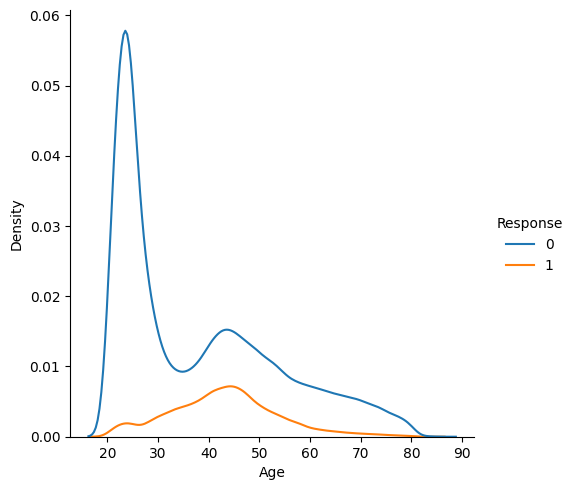

In [37]:
dist_feat_w_target('Age')

# Policy_Sales_Channel

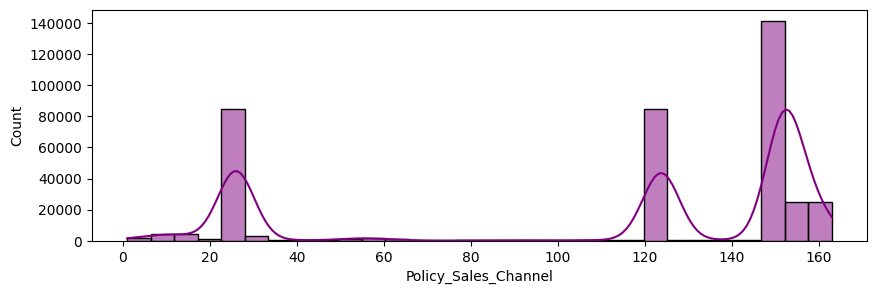

In [38]:
hist_feat('Policy_Sales_Channel')

# Policy_Sales_Channel wrt Response

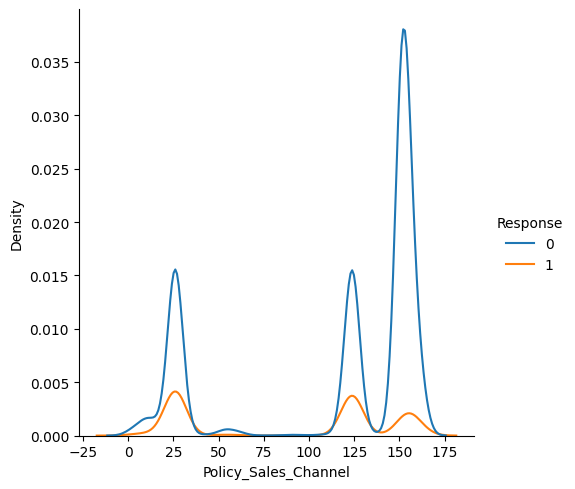

In [39]:
dist_feat_w_target('Policy_Sales_Channel')

# Annual_Premium

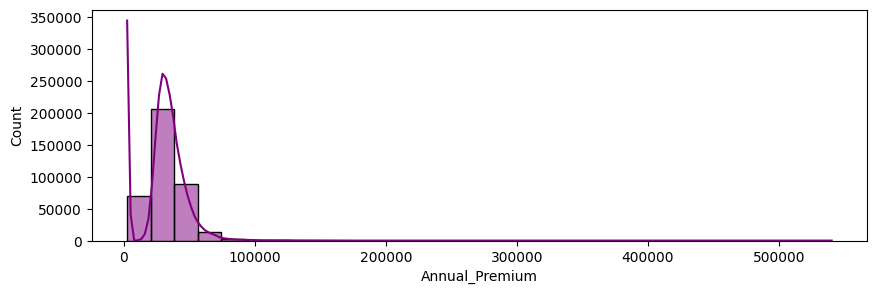

In [40]:
hist_feat('Annual_Premium')

# Annual_Premium wrt Response

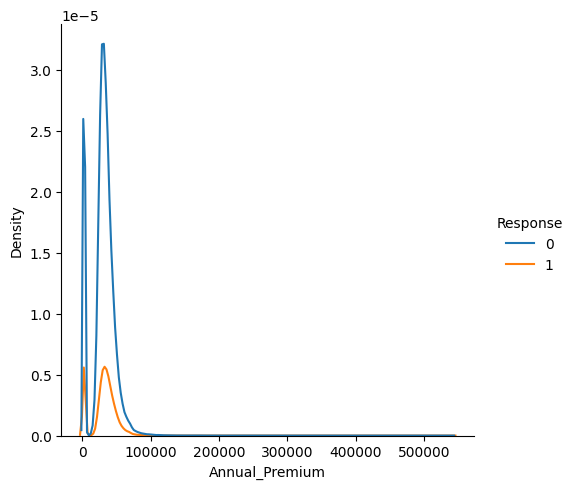

In [41]:
dist_feat_w_target('Annual_Premium')

# Top 5 Region_Code

Text(0.5, 1.0, 'Top 5 Region_Code ')

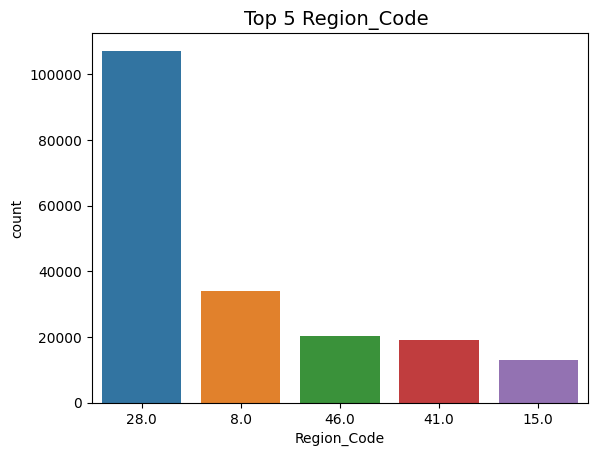

In [42]:
sns.countplot(x = 'Region_Code',data=df, order=df.Region_Code.value_counts().iloc[:5].index)
plt.title('Top 5 Region_Code ', fontsize=14) 

# 7. Encoding Categorical Features¶


In [43]:
X = df.drop(['Response'],axis = 1)
y = df['Response']

In [44]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,167647,22,1,7.0,1,2630.0,152.0,16,True,True,False,False
1,17163,42,1,28.0,0,43327.0,26.0,135,True,False,False,True
2,32023,66,1,33.0,0,35841.0,124.0,253,False,False,False,True
3,87447,22,1,33.0,0,27645.0,152.0,69,False,True,False,False
4,501933,28,1,46.0,1,29023.0,152.0,211,True,True,False,False


# 8. Splitting data set to training and Test set

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 9. Feature Scaling

In [46]:
cols = X_train.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

# 10. Random Sampling

## 10.1 Oversample minority class

In [47]:
train_data=pd.concat([X_train,y_train],axis=1)

Response_Zero=train_data[train_data.Response==0]
Response_One=train_data[train_data.Response==1]


In [48]:
upsampled_One = resample(Response_One,
                          replace=True, # sample with replacement
                          n_samples=len(Response_Zero), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([Response_Zero, upsampled_One])

In [49]:
y_train.value_counts()

Response
0    223800
1     43707
Name: count, dtype: int64

In [50]:
upsampled['Response'].value_counts()

Response
0.0    223800
1.0    223800
Name: count, dtype: int64

# Visualisation of Target of Oversampled minority class

Text(0, 0.5, 'count')

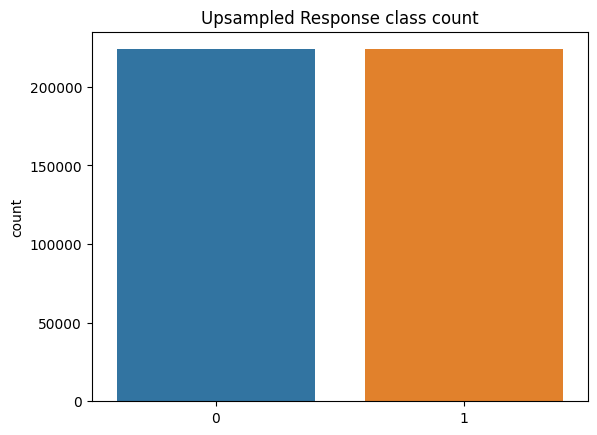

In [51]:
y1=upsampled.Response.value_counts()
sns.barplot(y=y1,x=[0,1])
plt.title('Upsampled Response class count')
plt.ylabel('count')

# 10.2 Undersample majority class

In [52]:
df['Response'].value_counts()

Response
0    319553
1     62601
Name: count, dtype: int64

In [53]:
downsampled_Zero = resample(Response_Zero,
                                replace = False, # sample without replacement
                                n_samples = len(Response_One), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([downsampled_Zero, Response_One])

In [54]:
downsampled['Response'].value_counts()

Response
0.0    43707
1.0    43707
Name: count, dtype: int64

Text(0, 0.5, 'count')

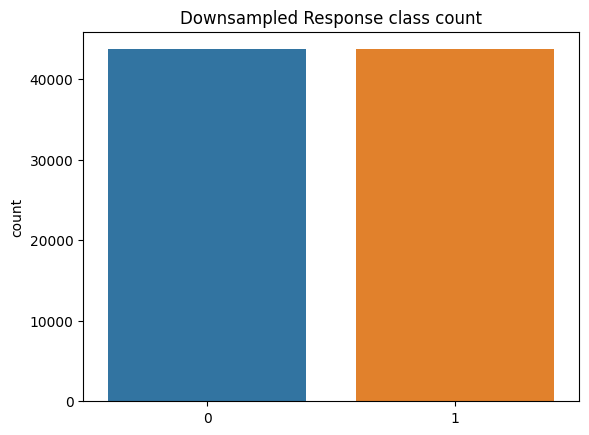

In [55]:
y2=downsampled.Response.value_counts()
sns.barplot(y=y2,x=[0,1])
plt.title('Downsampled Response class count')
plt.ylabel('count')

# 10.3. SMOTE

## SMOTE model building¶

In [57]:
classifier = RandomForestClassifier #we will use the Random Forest classifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier(random_state=42))

In [58]:
smote_model = smote_pipeline.fit(X_train, y_train)

In [59]:
y_train.shape

(267507,)

In [60]:
smote_prediction = smote_model.predict(X_test)

In [61]:
#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_resample(X, y)

print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 319553, 1: 62601})
SMOTE data distribution: Counter({0: 319553, 1: 319553})


In [62]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix: ")
cm  = confusion_matrix(y_test, smote_prediction)
print(cm)

Confusion Matrix: 
[[88380  7373]
 [ 7887 11007]]


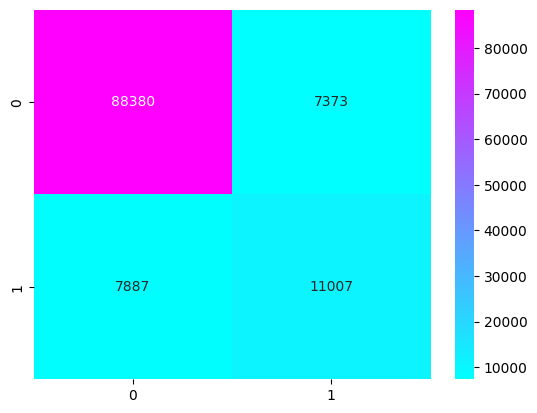

In [63]:
sns.heatmap(cm, annot=True, fmt='d', cmap='cool')
plt.show()

In [64]:
print('Test Accuracy is  : ', (metrics.accuracy_score(y_test, smote_prediction))) 

Test Accuracy is  :  0.8668957757289768


# 11. Reference

https://medium.com/nerd-for-tech/class-imbalance-problem-and-ways-to-handle-it-4861a195398a


 https://sandhyakrishnan02.medium.com/why-sampling-is-needed-different-types-of-sampling-81d58a08b4ba
